Average Estimated values: [0.19726419 0.49200252 0.69866846]
Average Counts: [ 33.677  45.295 921.028]
Final Cumulative Reward: 673.952
Average Regret: 26.048000000000002
Difference between true and average estimated values: [0.00273581 0.00799748 0.00133154]


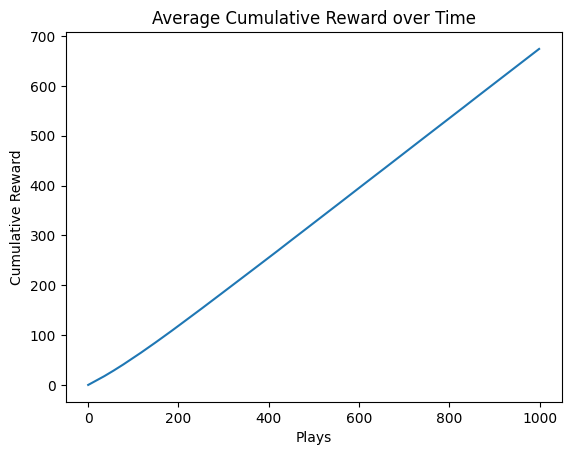

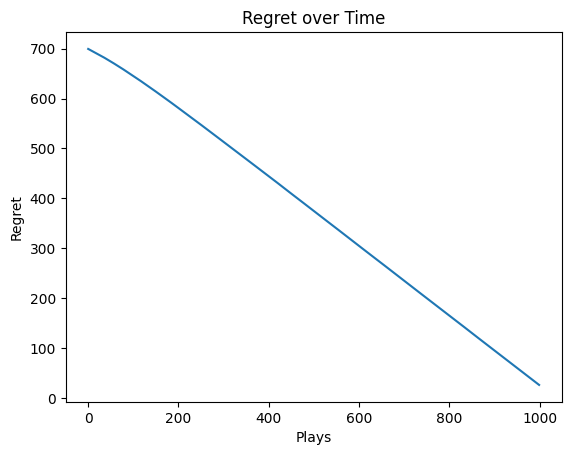

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs):
  Q = np.zeros(num_arms) # estimated rewards for each arm
  N = np.zeros(num_arms) # number of times each arm has been pulled
  rewards = []  # List to store the rewards from each play

  def pull_arm(arm):
    return np.random.rand() < true_reward_probs[arm]

  epsilon = initial_epsilon

  for t in range(num_plays):
    if np.random.rand() < epsilon: # exploration
      arm = np.random.choice(num_arms) # Randomly select an arm
    else: # exploitation
      arm = np.argmax(Q) # Select the arm with the highest estimated reward

    reward = pull_arm(arm)
    rewards.append(reward)

    N[arm] += 1
    Q[arm] += (reward - Q[arm]) / N[arm] # Incremental update for Q

    # Decay epsilon
    epsilon *= decay_rate

  return Q, N, rewards

# Parameters
num_arms = 3
num_plays = 1000
initial_epsilon = 1.0
decay_rate = 0.99
true_reward_probs = [0.2, 0.5, 0.7]
num_simulations = 1000

# Run multiple simulations to get a better understanding of the agent's performance.
all_Q = np.zeros((num_simulations, num_arms))
all_N = np.zeros((num_simulations, num_arms))
all_rewards = np.zeros((num_simulations, num_plays))

for i in range(num_simulations):
  Q, N, rewards = epsilon_greedy_with_decay(num_arms, num_plays, initial_epsilon, decay_rate, true_reward_probs)
  all_Q[i] = Q
  all_N[i] = N
  all_rewards[i] = np.cumsum(rewards) #Store cumulative rewards

# Average results across all simulations
avg_Q = np.mean(all_Q, axis=0)
avg_N = np.mean(all_N, axis=0)
avg_cumulative_reward = np.mean(all_rewards, axis=0)
final_cumulative_reward = avg_cumulative_reward[-1]
best_arm_reward = max(true_reward_probs) * num_plays
avg_regret = best_arm_reward - final_cumulative_reward

print("Average Estimated values:", avg_Q)
print("Average Counts:", avg_N)
print("Final Cumulative Reward:", final_cumulative_reward)
print("Average Regret:", avg_regret)
print("Difference between true and average estimated values:", np.abs(true_reward_probs - avg_Q))

#Plot cumulative rewards over time
plt.plot(avg_cumulative_reward)
plt.xlabel("Plays")
plt.ylabel("Cumulative Reward")
plt.title("Average Cumulative Reward over Time")
plt.show()

#Plot regret over time
regrets = best_arm_reward - avg_cumulative_reward
plt.plot(regrets)
plt.xlabel("Plays")
plt.ylabel("Regret")
plt.title("Regret over Time")
plt.show()